In [47]:
import itertools

import scipy
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing

from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [48]:
# def get_max_r2(s1, s2):
#     indexes = np.arange(1250)
#     best_r2 = 0
#     for i in range(1250):
#         corr, p = scipy.stats.pearsonr(s1[indexes], s2)
#         best_r2 = max(corr ** 2, best_r2)
#         indexes = np.roll(indexes, 1)
#     return best_r2

# def min_max_r2_in_group(series):
#     min_r2, max_r2= 1, 0
#     C = itertools.combinations(np.arange(len(series)), r=2)
#     for i, j in C:
#         r2 = get_max_r2(series.loc[i], series.loc[j])
#         min_r2 = min(r2, min_r2)
#         max_r2 = max(r2, max_r2)
#     return min_r2, max_r2

In [49]:
feat = {}

df = pd.read_csv('../data/db.csv', index_col=[0, 1, 2])
df.head()

0           1           2  \
class state                sample                                       
bad   cylinder_1st_off_is0 0       294.027565  292.906178  294.629156   
                           1       292.460015  293.503185  293.503185   
                           2       293.577982  293.577982  294.102630   
                           3       291.497976  291.867241  291.129644   
                           4       292.015209  293.055202  294.027565   

                                            3           4           5  \
class state                sample                                       
bad   cylinder_1st_off_is0 0       294.629156  294.553823  293.727690   
                           1       293.652817  293.353705  292.980671   
                           2       295.157571  294.629156  291.719423   
                           3       291.571754  291.276865  291.571754   
                           4       293.428426  293.503185  292.015209   

                                            6           7           8  \
class state                sample                                       
bad   cylinder_1st_off_is0 0       294.177732  295.308895  295.081967   
                           1       292.906178  292.163327  292.460015   
                           2       291.497976  293.353705  295.915746   
                           3       291.571754  292.831723  294.252874   
                           4       293.577982  293.279022  292.906178   

                                            9  ...        1240        1241  \
class state                sample              ...                           
bad   cylinder_1st_off_is0 0       295.460374  ...  290.322581  291.056089   
                           1       293.503185  ...  290.688872  290.688872   
                           2       295.991778  ...  291.129644  291.424235   
                           3       296.296296  ...  294.027565  294.102630   
                           4       294.177732  ...  291.719423  294.779939   

                                         1242        1243        1244  \
class state                sample                                       
bad   cylinder_1st_off_is0 0       290.615540  292.385787  292.015209   
                           1       291.056089  295.081967  295.536172   
                           2       292.089249  293.055202  292.682927   
                           3       294.177732  293.877551  293.577982   
                           4       295.384615  294.855388  293.353705   

                                         1245        1246        1247  \
class state                sample                                       
bad   cylinder_1st_off_is0 0       292.534281  293.279022  292.980671   
                           1       295.612009  293.279022  291.571754   
                           2       291.867241  291.129644  291.056089   
                           3       292.980671  293.279022  292.682927   
                           4       291.203236  290.030211  289.665577   

                                         1248        1249  
class state                sample                          
bad   cylinder_1st_off_is0 0       291.941206  291.941206  
                           1       292.608585  293.727690  
                           2       291.129644  291.497976  
                           3       292.163327  290.982571  
                           4       289.519980  290.249433  

[5 rows x 1250 columns]

In [50]:
df['state'] = [i if i != 'good_300kWt' else 'good' for i in df.index.get_level_values(1)]

In [51]:
df = df.reset_index(level=1, drop=True).reset_index().set_index(['class', 'state', 'sample'])

## Signal view

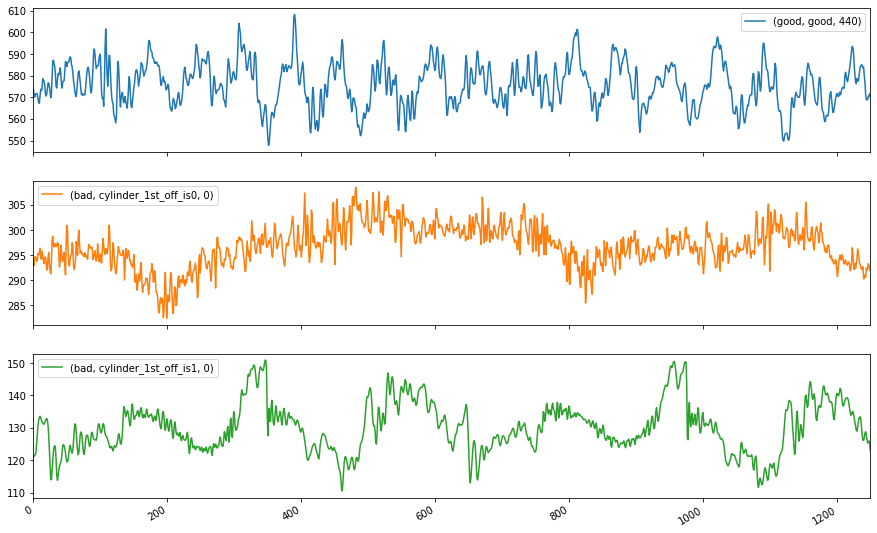

In [52]:
_ = df.loc[[
    ('good', 'good', 440),
    ('bad', 'cylinder_1st_off_is0', 0),
    ('bad', 'cylinder_1st_off_is1', 0)
]].T.plot(subplots=True, figsize=(15, 10))

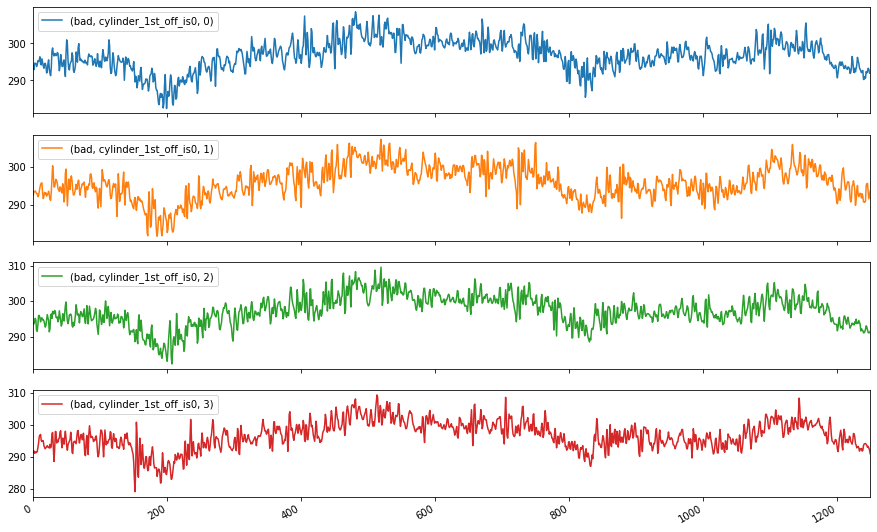

In [53]:
_ = df.loc[[
    ('bad', 'cylinder_1st_off_is0', 0),
    ('bad', 'cylinder_1st_off_is0', 1),
    ('bad', 'cylinder_1st_off_is0', 2),
    ('bad', 'cylinder_1st_off_is0', 3)
]].T.plot(subplots=True, figsize=(15, 10))

In [8]:
df.loc[[
    ('bad', 'cylinder_1st_off_is0', 0),
    ('bad', 'cylinder_1st_off_is0', 1),
    ('bad', 'cylinder_1st_off_is0', 2),
    ('bad', 'cylinder_1st_off_is0', 3)
]].T.corr()

class                                              bad                      \
state                             cylinder_1st_off_is0                       
sample                                               0         1         2   
class state                sample                                            
bad   cylinder_1st_off_is0 0                  1.000000  0.797126  0.806475   
                           1                  0.797126  1.000000  0.823334   
                           2                  0.806475  0.823334  1.000000   
                           3                  0.741448  0.802025  0.830600   

class                                        
state                                        
sample                                    3  
class state                sample            
bad   cylinder_1st_off_is0 0       0.741448  
                           1       0.802025  
                           2       0.830600  
                           3       1.000000

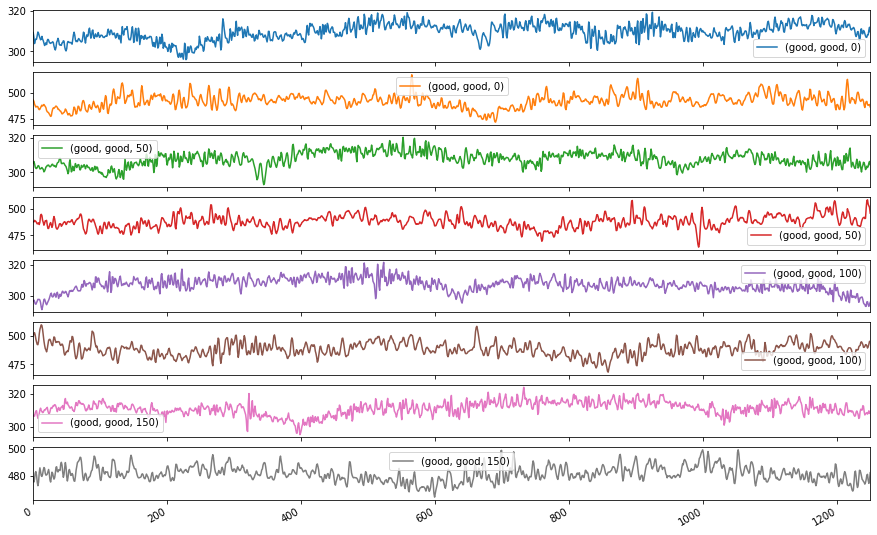

In [9]:
_ = df.loc[[
    ('good', 'good', 0),
    ('good', 'good', 50),
    ('good', 'good', 100),
    ('good', 'good', 150)
]].T.plot(subplots=True, figsize=(15, 10))

In [10]:
df.loc[[
    ('good', 'good', 0),
    ('good', 'good', 50),
    ('good', 'good', 100),
    ('good', 'good', 150)
]].T.corr()

class                   good                                          \
state                   good                                           
sample                   0         0         50        50        100   
class state sample                                                     
good  good  0       1.000000  0.081972  0.195503  0.057567  0.126384   
            0       0.081972  1.000000  0.120388  0.108159  0.140105   
            50      0.195503  0.120388  1.000000  0.189264  0.332477   
            50      0.057567  0.108159  0.189264  1.000000 -0.128783   
            100     0.126384  0.140105  0.332477 -0.128783  1.000000   
            100     0.233476 -0.119428 -0.057650  0.084412 -0.102222   
            150     0.167876 -0.059474 -0.083376 -0.067413 -0.076773   
            150    -0.273192  0.028597 -0.148179 -0.151507  0.052335   

class                                             
state                                             
sample                   100       150       150  
class state sample                                
good  good  0       0.233476  0.167876 -0.273192  
            0      -0.119428 -0.059474  0.028597  
            50     -0.057650 -0.083376 -0.148179  
            50      0.084412 -0.067413 -0.151507  
            100    -0.102222 -0.076773  0.052335  
            100     1.000000 -0.048931 -0.088917  
            150    -0.048931  1.000000  0.069687  
            150    -0.088917  0.069687  1.000000

In [11]:
ax = pd.DataFrame([
    np.convolve(df.loc[('good', 'good', 0)], [1, -1], mode='valid'), 
    np.convolve(df.loc[('good', 'good', 0)], [1, -1], mode='valid') * signal.windows.hann(1249),
    np.convolve(df.loc[('good', 'good', 0)], [1, -1], mode='valid') * signal.windows.cosine(1249)
]).T.rename(columns={0:'Дельта-сигнал', 1:'З вікном Ханн', 2:'З Косинусним вікном'}).plot(figsize=(15, 10), subplots=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


ValueError: object too deep for desired array

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128f2c6d0>,
      dtype=object)

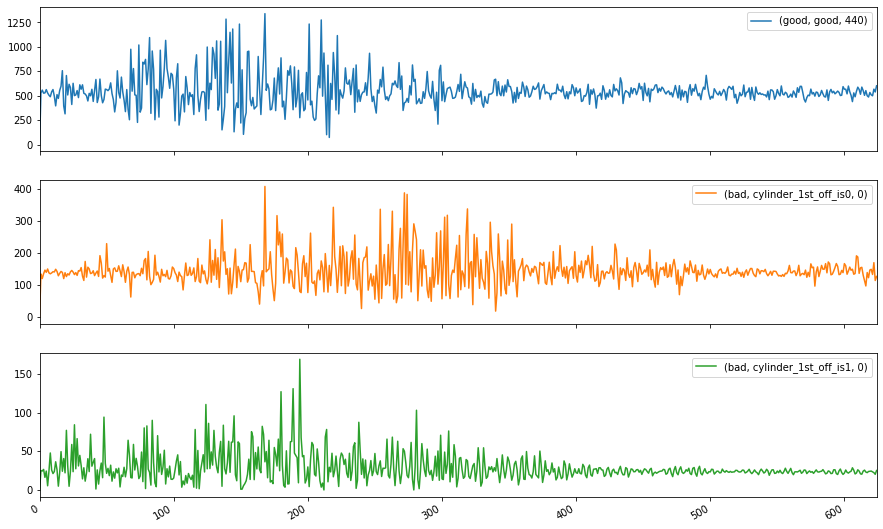

In [12]:
df.loc[[
    ('good', 'good', 440),
    ('bad', 'cylinder_1st_off_is0', 0),
    ('bad', 'cylinder_1st_off_is1', 0)
]].T.apply(lambda s: np.convolve(s, [1, -1])).apply(lambda s: signal.spectrogram(s, nperseg=1249, window='boxcar')[2].ravel()).plot(subplots=True, figsize=(15, 10))

## Spectrum analysis

In [13]:
seqs_df = df.groupby(level=[0, 1]).apply(lambda g: g.iloc[:4].reset_index(drop=True).unstack(level=0).T.sort_index(level=[1, 0]).T)

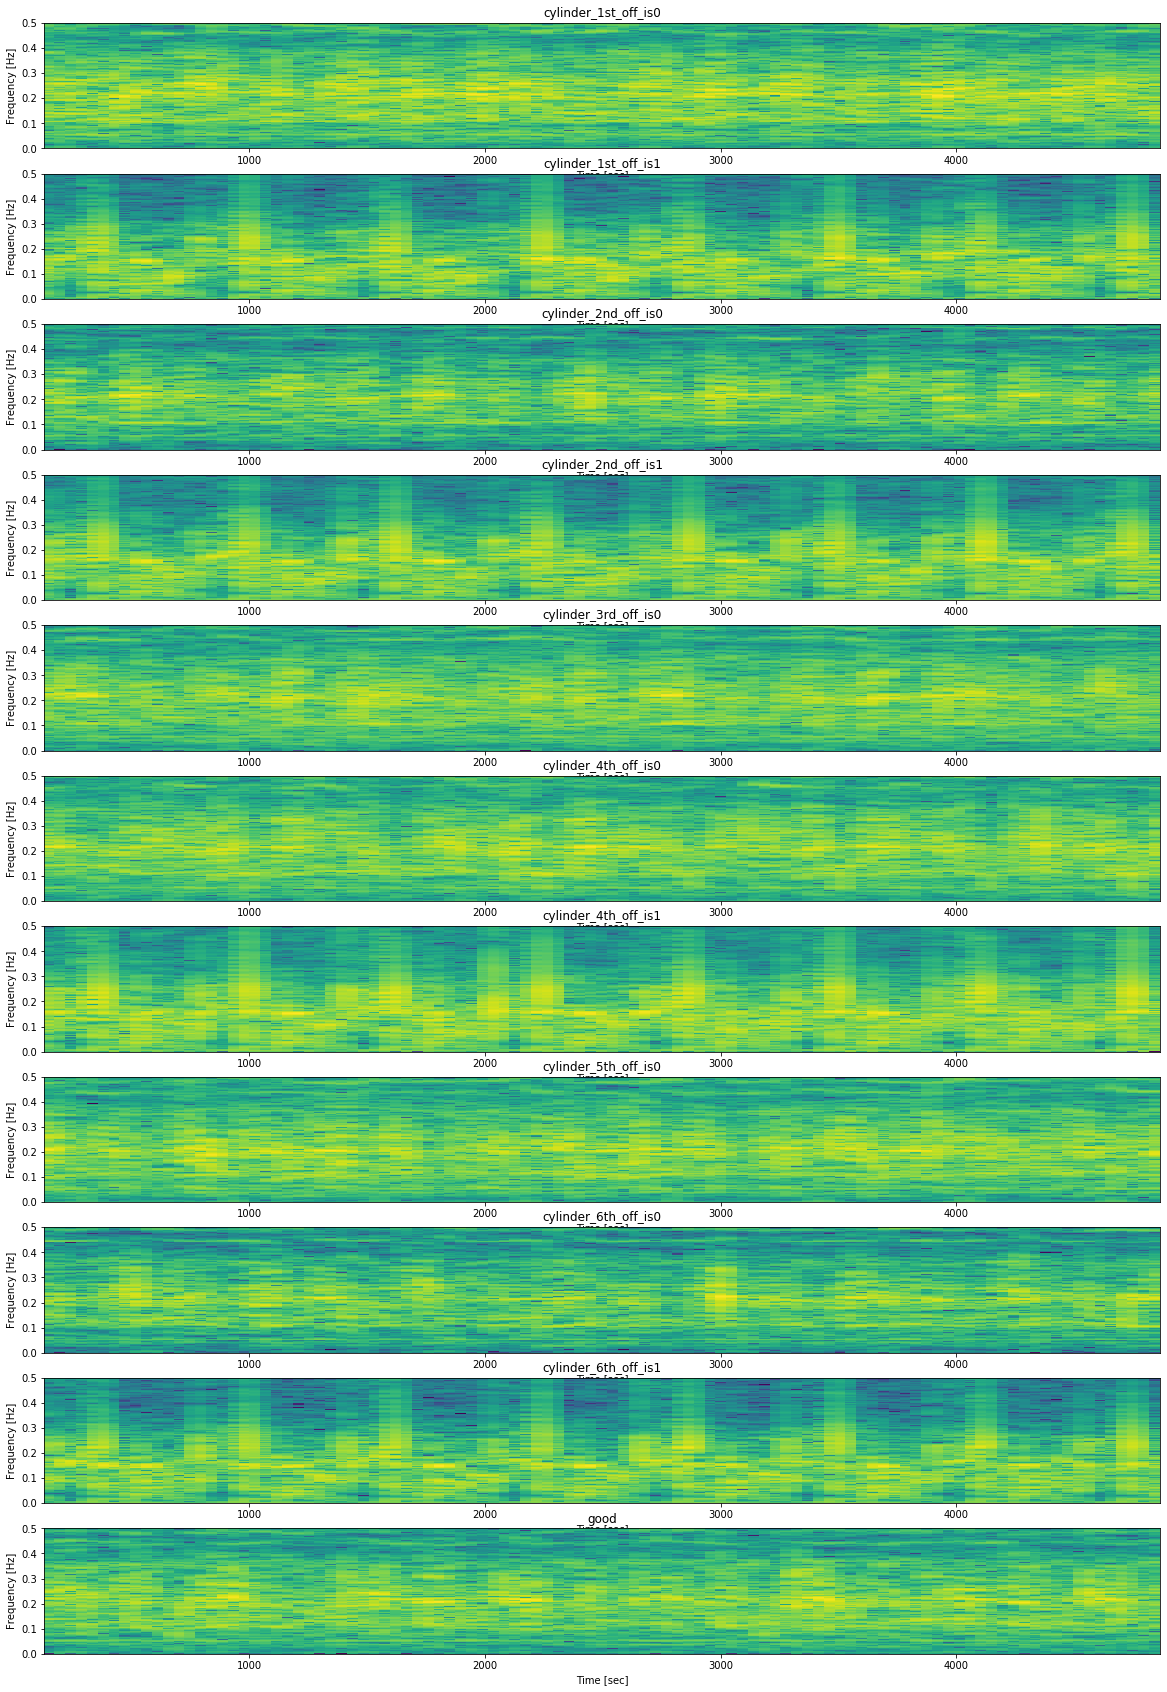

In [14]:
plt.figure(figsize=(20, 30))
i = 1

window = [1, -1]

for cols in seqs_df.T:
    t, f, Sxx = signal.spectrogram(np.convolve(seqs_df.T[cols], window, mode='valid'), window='hann', nperseg=256, noverlap=210, scaling='spectrum')
    
    plt.subplot(len(seqs_df), 1, i)
    plt.pcolormesh(f, t, np.log(Sxx))
    plt.title(cols[1])
    
    i+=1

    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')


## Autocorrelation for different classes

In [15]:
df.groupby(level=1).apply(lambda g: np.mean(g.T.apply(lambda s: scipy.stats.pearsonr(s[:-1].values, s[1:].values)[0]).T)).sort_values()


state
cylinder_4th_off_is0    0.840548
cylinder_6th_off_is0    0.861896
cylinder_5th_off_is0    0.865323
cylinder_2nd_off_is0    0.871641
cylinder_3rd_off_is0    0.873387
cylinder_1st_off_is0    0.889419
good                    0.900708
cylinder_6th_off_is1    0.970572
cylinder_4th_off_is1    0.970578
cylinder_2nd_off_is1    0.971358
cylinder_1st_off_is1    0.973245
dtype: float64

## Feature extraction

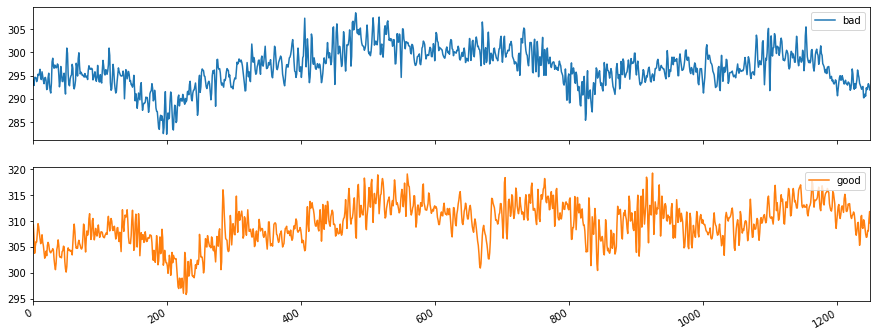

In [16]:
df.groupby(level=0).apply(lambda g: g.iloc[0]).T.plot(subplots=True, figsize=(15, 6))
_ = [ax.legend(loc=1) for ax in plt.gcf().axes]

feat['time'] = df

## FIR and IIR filters

Butterworth filter

In [17]:
props = [(1, 0.1), (1, 0.01)]

for N, Wn in props:
    a, b = signal.butter(N, Wn)
    feat[f'time_butter_{N}_{Wn}'] = feat['time'].T.apply(lambda x: signal.filtfilt(a, b, x)).T

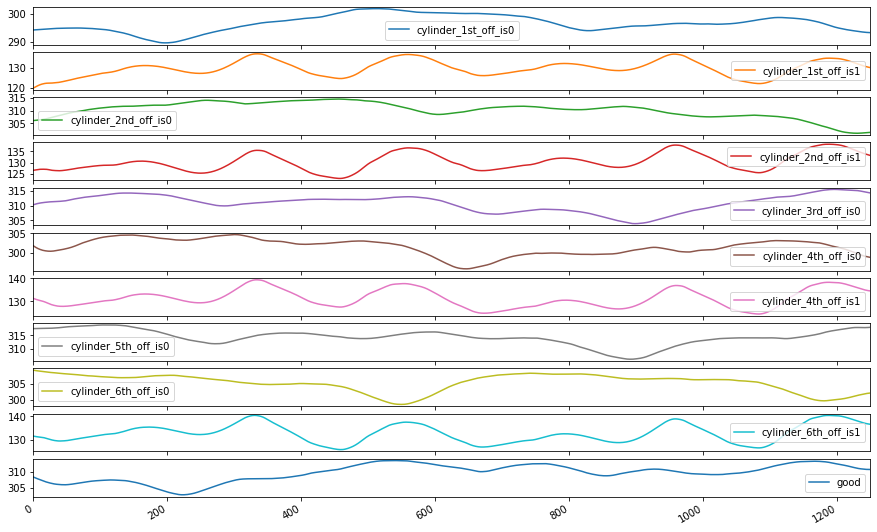

In [18]:
df = feat['time_butter_1_0.01']

_ = df.groupby(level=1).apply(lambda g: g.iloc[0]).T.plot(subplots=True, figsize=(15, 10))

In [19]:
for wnd_size in [3, 11, 49, 101]:
    window = np.ones(wnd_size) / wnd_size
    feat[f'time_smooth_boxcar_{wnd_size}'] = feat['time'] \
        .T \
        .apply(lambda s: np.convolve(s, window, mode='valid')) \
        .T

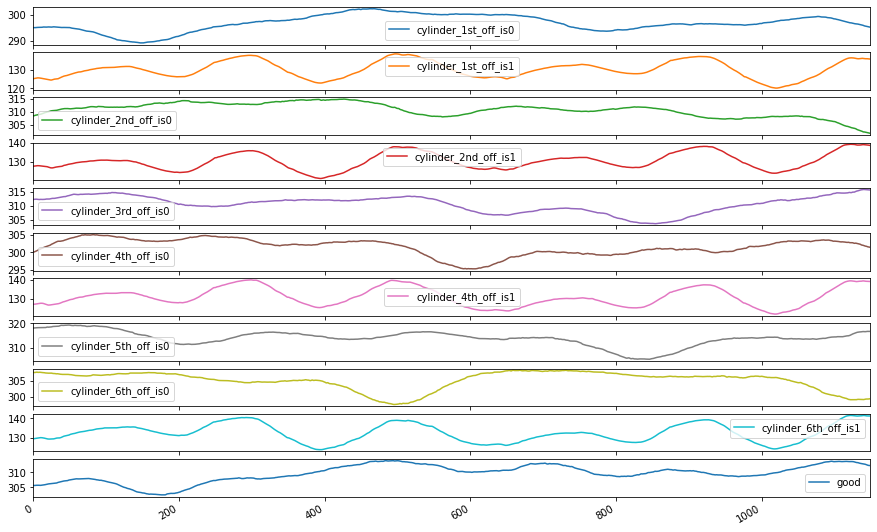

In [20]:
df = feat['time_smooth_boxcar_101']

_ = df.groupby(level=1).apply(lambda g: g.iloc[0]).T.plot(subplots=True, figsize=(15, 10))

## Time to delta time

In [21]:
window = [1.0, -1.0]
delta_feat = {}

for k, df in feat.items():
    delta_feat[f'{k}/delta'] = df.T.apply(lambda s: np.convolve(s, window, mode='valid')).T
feat.update(delta_feat)

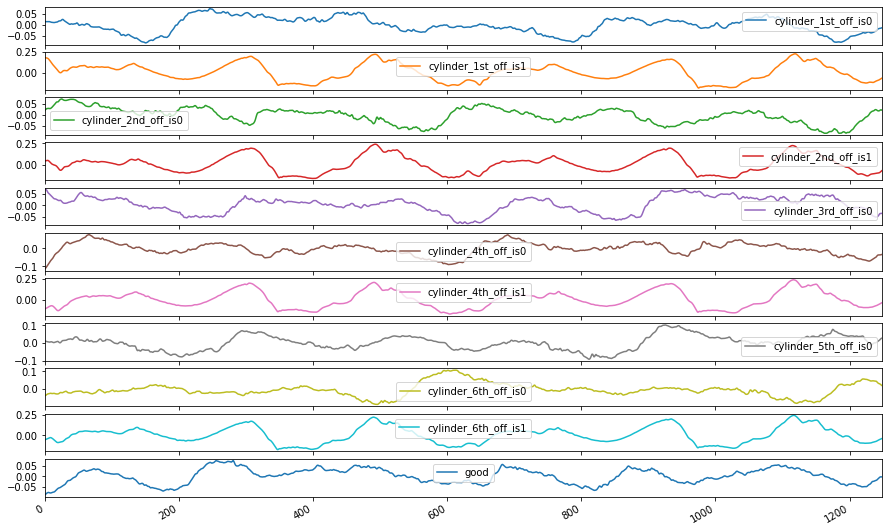

In [22]:
df = feat[f'time_butter_1_0.01/delta']

_ = df.groupby(level=1).apply(lambda g: g.iloc[0]).T.plot(subplots=True, figsize=(15, 10))

## FFT

In [23]:
fft_feat = {}

for k, df in feat.items():
    fft_feat[f'{k}/fft'] = df.T.apply(
        lambda s: signal.spectrogram(
            s,
            nperseg=s.size,
            window='hann',
            scaling='spectrum',
            mode='magnitude'
        )[2].ravel(), 
    ).T

feat.update(fft_feat)

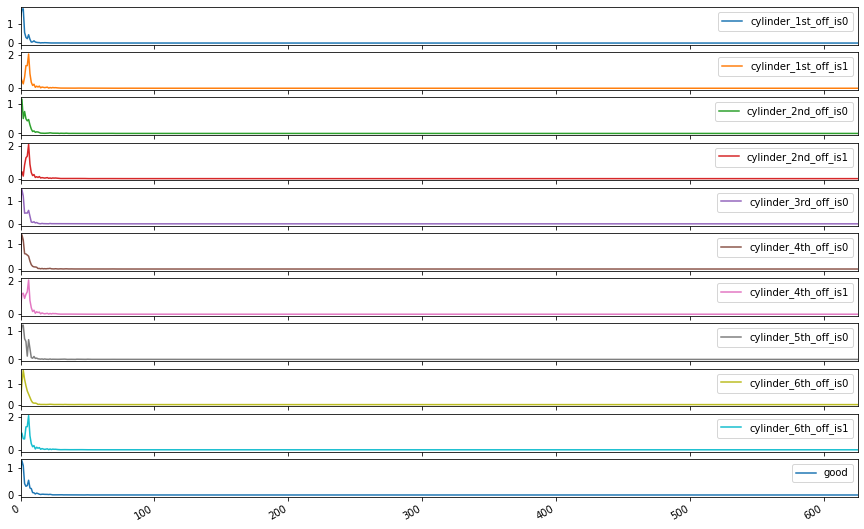

In [24]:
df = feat[f'time_butter_1_0.01/fft']

_ = df.groupby(level=1).apply(lambda g: g.iloc[0]).T.plot(subplots=True, figsize=(15, 10))

We found that mainly our mean etalon signal looks like a sinusoid. So we can pad all signals to the same phase to have the ability to work with the same look.

In [25]:
stat_feat = {}

for k, df in feat.items():
  stat_feat[f'stat/{k}'] = df.T.apply(lambda s: s.describe(include='all')).T

feat.update(stat_feat)

In [26]:
ffeat = {k: v for k, v in feat.items() if k.startswith('time/delta/fft')}

In [27]:
feat.keys()

dict_keys(['time', 'time_butter_1_0.1', 'time_butter_1_0.01', 'time_smooth_boxcar_3', 'time_smooth_boxcar_11', 'time_smooth_boxcar_49', 'time_smooth_boxcar_101', 'time/delta', 'time_butter_1_0.1/delta', 'time_butter_1_0.01/delta', 'time_smooth_boxcar_3/delta', 'time_smooth_boxcar_11/delta', 'time_smooth_boxcar_49/delta', 'time_smooth_boxcar_101/delta', 'time/fft', 'time_butter_1_0.1/fft', 'time_butter_1_0.01/fft', 'time_smooth_boxcar_3/fft', 'time_smooth_boxcar_11/fft', 'time_smooth_boxcar_49/fft', 'time_smooth_boxcar_101/fft', 'time/delta/fft', 'time_butter_1_0.1/delta/fft', 'time_butter_1_0.01/delta/fft', 'time_smooth_boxcar_3/delta/fft', 'time_smooth_boxcar_11/delta/fft', 'time_smooth_boxcar_49/delta/fft', 'time_smooth_boxcar_101/delta/fft', 'stat/time', 'stat/time_butter_1_0.1', 'stat/time_butter_1_0.01', 'stat/time_smooth_boxcar_3', 'stat/time_smooth_boxcar_11', 'stat/time_smooth_boxcar_49', 'stat/time_smooth_boxcar_101', 'stat/time/delta', 'stat/time_butter_1_0.1/delta', 'stat/ti

In [28]:
ffeat.keys()

dict_keys(['time/delta/fft'])

time/delta/fft


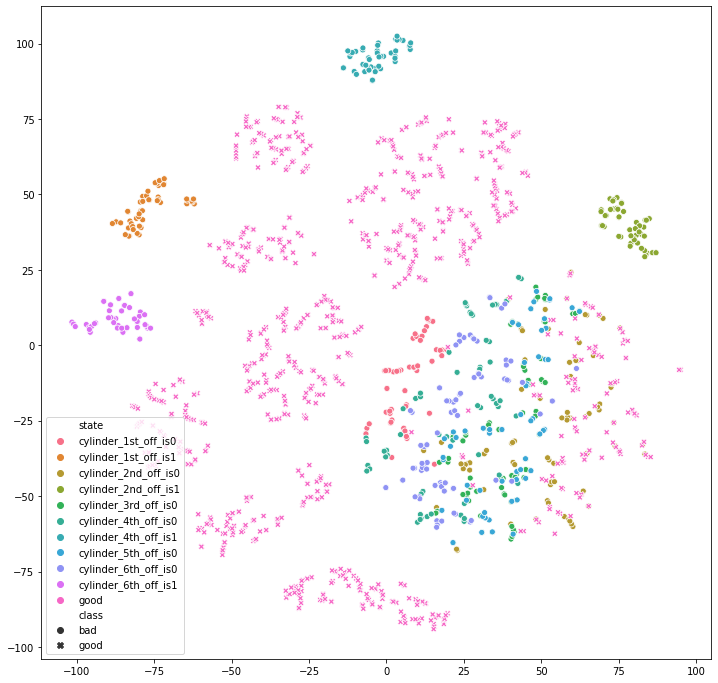

In [29]:
for k, df in ffeat.items():

    print(k)
    zip_df = TSNE(perplexity=4).fit_transform(df)

    fig = plt.figure(figsize=(12, 12))
    _ = sns.scatterplot(
        x=zip_df[:, 0],
        y=zip_df[:, 1],
        hue=df.index.get_level_values('state'),
        style=df.index.get_level_values('class')
    )

In [61]:
lr_res = {}

for k, df in ffeat.items():
    print(k)
    
    train = df.sample(frac=0.8, random_state=0)
    test = df.drop(train.index)
    
    param_grid = {
        'multi_class': ['ovr'],
        'max_iter': [1000],
        'C': [0.01, 0.1, 1, 10, 100], 
        'class_weight': [{'good': 0.95, 'bad': 0.05}, {'good': 0.5, 'bad': 0.5}, {'good': 0.75, 'bad': 0.25}, {'good': .99, 'bad': 0.01}],
        'solver': ['lbfgs']
    }
    
    lr = GridSearchCV(LogisticRegression(), param_grid, cv=4)
    lr = lr.fit(train, train.index.get_level_values('class'))
    
    f1_train = metrics.f1_score(lr.predict(train), train.index.get_level_values(0), average='weighted')
    f1_test = metrics.f1_score(lr.predict(test), test.index.get_level_values(0), average='weighted')
    
    cm = pd.crosstab(test.index.get_level_values('class'), lr.predict(test))
    
    lr_res[k] = {}
    
    lr_res[k]['train_score'] = f1_train
    lr_res[k]['test_score'] = f1_test
    lr_res[k]['test_cm'] = cm

time/delta/fft


In [62]:
print(lr)


lr_res = dict(sorted(lr_res.items(), key=lambda x: x[1]['test_score']))
for k, v in lr_res.items():
    print()
    print(f'**{k}**')
    print(v['test_score'])
    display(v['test_cm'])

print(lr.best_estimator_.coef_.shape)
print(lr.best_estimator_)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{'bad': 0.05, 'good': 0.95},
                                          {'bad': 0.5, 'good': 0.5},
                                          {'bad': 0.25, 'good': 0.75},
                                          {'bad': 0.01, 'good': 0.99}],
     

col_0,bad,good
row_0,,
bad,117,5
good,0,58


(1, 625)
LogisticRegression(C=10, class_weight={'bad': 0.25, 'good': 0.75}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x129ddcd50>],
      dtype=object)

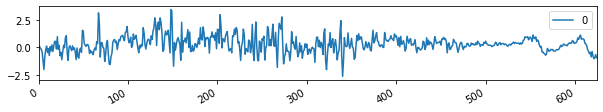

In [68]:
pd.DataFrame(lr.best_estimator_.coef_).T.plot(subplots=True, figsize=(10, 1.5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129802790>,
      dtype=object)

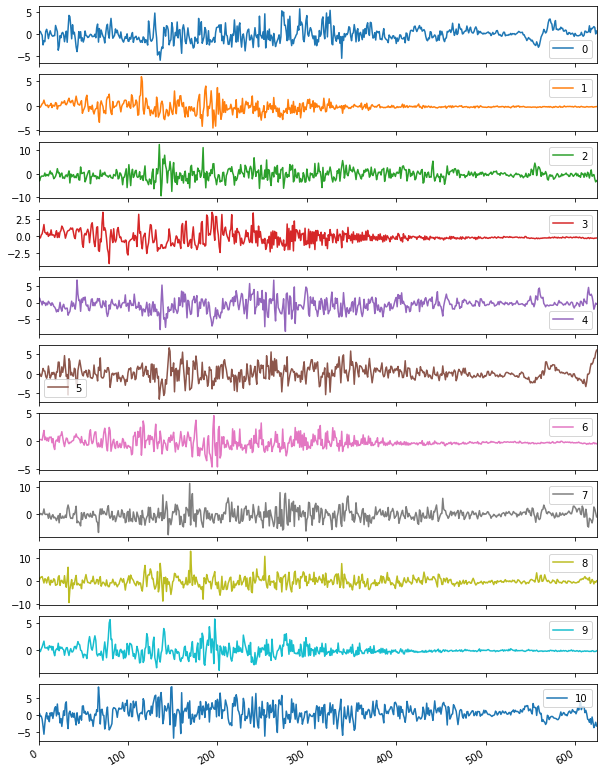

In [60]:
pd.DataFrame(lr.best_estimator_.coef_).T.plot(subplots=True, figsize=(10, 15))


In [40]:
lr_res = {}


for k, df in ffeat.items():

    train = df.sample(frac=0.8, random_state=0)
    test = df.drop(train.index)
    
    param_grid = {
        'multi_class': ['ovr'],
        'max_iter': [1000],
        'C': [0.01, 0.1, 1, 10, 100], 
#         'class_weight': [{'fine': 0.95, 'bad': 0.05}],
        'solver': ['lbfgs']
    }
    
    lr = GridSearchCV(LogisticRegression(), param_grid, cv=4)
    lr = lr.fit(train, train.index.get_level_values('state'))
    
    f1_train = metrics.f1_score(lr.predict(train), train.index.get_level_values(1), average='weighted')
    f1_test = metrics.f1_score(lr.predict(test), test.index.get_level_values(1), average='weighted')
    
    cm = pd.crosstab(test.index.get_level_values('state'), lr.predict(test))
    
    lr_res[k] = {}
    
    lr_res[k]['train_score'] = f1_train
    lr_res[k]['test_score'] = f1_test
    lr_res[k]['test_cm'] = cm

In [43]:
print(lr)


lr_res = dict(sorted(lr_res.items(), key=lambda x: x[1]['test_score']))
for k, v in lr_res.items():
    print()
    print(f'**{k}**')
    print(v['test_score'])
    display(v['test_cm'])
    
print(lr.best_estimator_.coef_)
print(lr.best_estimator_)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'multi_class': ['ovr'], 'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**time/delta/fft**
0.8979136564107237


col_0,cylinder_1st_off_is0,cylinder_1st_off_is1,cylinder_2nd_off_is0,cylinder_2nd_off_is1,cylinder_3rd_off_is0,cylinder_4th_off_is0,cylinder_4th_off_is1,cylinder_5th_off_is0,cylinder_6th_off_is0,cylinder_6th_off_is1,good
row_0,,,,,,,,,,,
cylinder_1st_off_is0,11,0,0,0,0,0,0,0,0,0,0
cylinder_1st_off_is1,0,13,0,0,0,0,0,0,0,0,0
cylinder_2nd_off_is0,0,0,11,0,2,1,0,2,1,0,4
cylinder_2nd_off_is1,0,0,0,12,0,0,0,0,0,0,0
cylinder_3rd_off_is0,1,0,0,0,12,0,0,1,0,0,0
cylinder_4th_off_is0,1,0,1,0,0,8,0,0,1,0,0
cylinder_4th_off_is1,0,0,0,0,0,0,6,0,0,0,0
cylinder_5th_off_is0,0,0,0,0,3,0,0,3,1,0,1
cylinder_6th_off_is0,0,0,0,0,0,0,0,0,17,0,0


[[-0.18233954  0.55445896  0.50241657 ...  1.4025497  -0.06559806
   0.60002228]
 [-0.12795551 -0.33177638 -0.26837343 ... -0.19917614 -0.17916111
  -0.1580885 ]
 [ 1.34900855 -3.00926659 -1.75334503 ... -2.19015542 -3.40913044
  -2.8659547 ]
 ...
 [ 0.1647901   0.6291983   1.60753605 ... -0.13783213 -0.5623169
   0.13679208]
 [-0.03135199  0.07567652 -0.33511524 ... -0.29324805 -0.30725212
  -0.19301856]
 [-0.66507753  0.53739051 -0.35536579 ... -3.02554575 -2.06806253
  -3.14436324]]
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [42]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [ ]:
lr.classes_

In [ ]:
lr.predict_proba([ffeat['stat/time_smooth_boxcar_101/delta/fft'].iloc[0]])

In [ ]:
lr.predict([ffeat['stat/time_smooth_boxcar_101/delta/fft'].iloc[0]])

In [ ]:
lr = GridSearchCV(LogisticRegression(), param_grid, cv=4)
lr = lr.fit(ffeat['time/fft'], ffeat['time/fft'].index.get_level_values('state'))

In [ ]:
lr.best_estimator_

In [ ]:
import pickle

In [ ]:
pickle.dump(lr.best_estimator_, open('estimator', 'wb'))

In [ ]:
loaded_model = pickle.load(open('estimator', 'rb'))

In [ ]:
lr.predict([ffeat['time/fft'].iloc[1]])